In [ ]:
# !pip install --upgrade pandas_datareader

: 

In [1]:
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
def get_data_yf(stocks, startDate):
    data = yf.download(stocks,startDate)['Close']
    returns = data.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return returns,meanReturns, covMatrix

tickers_list = ['AAPL','META', 'GOOG', 'PINS']

endDate = dt.datetime.now()
startDate = endDate -dt.timedelta(days = 300)

returns, meanReturns, covMatrix = get_data_yf(tickers_list, startDate)
print(meanReturns)

[*********************100%%**********************]  4 of 4 completed

Ticker
AAPL   -0.000545
GOOG    0.001942
META    0.002405
PINS    0.001375
dtype: float64


In [3]:
weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)
print(weights)

[0.25819207 0.33848215 0.24342342 0.15990236]


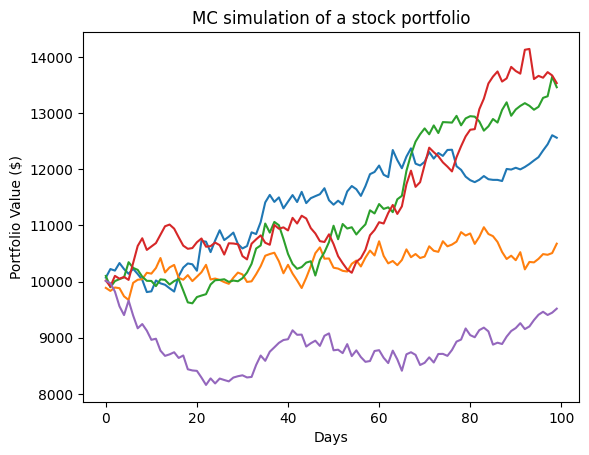

In [7]:
#monte carlo method
mc_sims = 5# number of simulations
T = 100 #timeframe in days
# mean matrix # how many stocks and days
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000
for m in range(0, mc_sims):
    # MC loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

: 